# WATER QUALITY PREDICTION USING MACHINE LEARNING 

1. Problem -> Predict if water is drinkable or not based on its physicochemical properties
2. Data -> Taken from Kaggle: 
3. Feature -> pH, Hardness, Solids, Cl, Sulfate, Conductivity, Total Org Carbon, Trihalomethanes, Turbidity

In [20]:
# Tools: 
## Herramientas necesarias 

# EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 

# Scikit learn models -> Based on https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Eval metrics 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
data = pd.read_csv('water_potability.csv')
data.shape

(3276, 10)

In [3]:
# Null-data 
data = data.dropna()
data.isna().sum()
data.shape

(2011, 10)

In [4]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


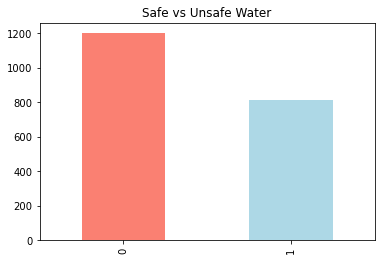

In [5]:
# Target visualization 
data["Potability"].value_counts().plot(kind = 'bar', color = ["salmon", "lightblue"], title = 'Safe vs Unsafe Water');

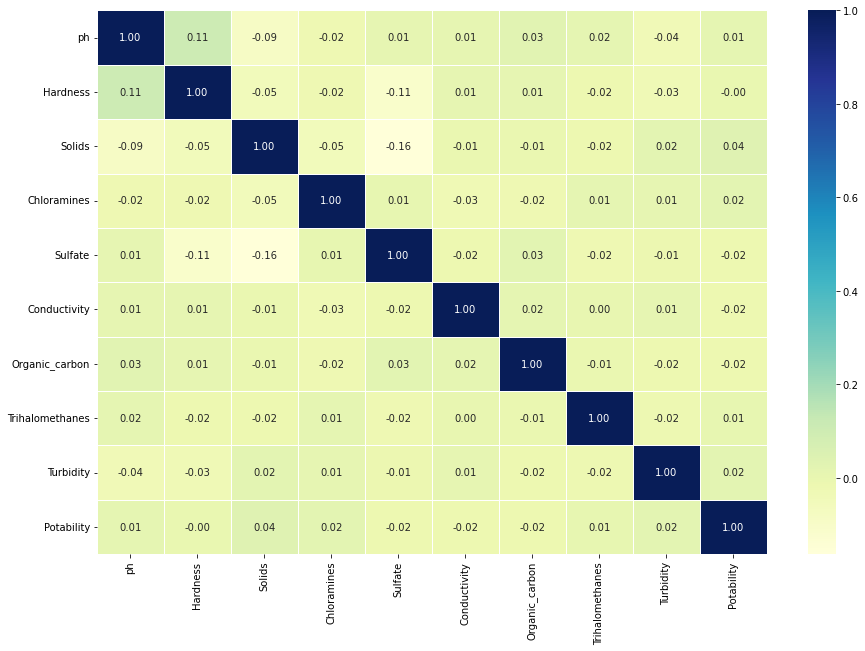

In [6]:
# Correlation matrix 
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix, 
                annot = True, 
                linewidths = 0.5, 
                fmt = ".2f",
                cmap = "YlGnBu");

## RELATIONSHIP BETWEEN PH AND CONDUCTIVITY
* When water is drinkable 

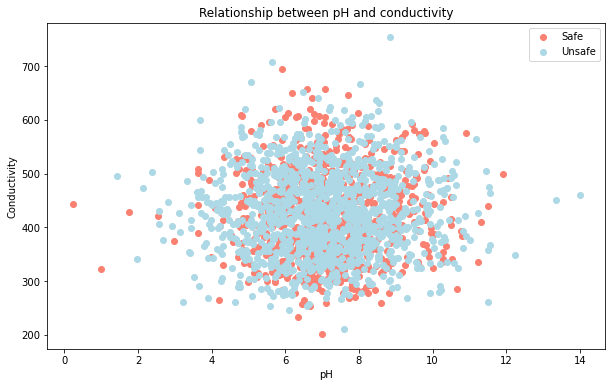

In [7]:
plt.figure(figsize = (10,6))

plt.scatter(data.ph[data.Potability == 1], 
           data.Conductivity[data.Potability == 1], 
           c="salmon")

plt.scatter(data.ph[data.Potability == 0], 
           data.Conductivity[data.Potability == 0], 
           c = "lightblue")

# Problema: Dificultad para sacar las conclusiones más importantes

#Información importante
plt.title("Relationship between pH and conductivity")
plt.xlabel("pH")
plt.ylabel("Conductivity")
plt.legend(["Safe", "Unsafe"])
plt.show()

#Q: Is the data real?  

# MACHINE LEARNING MODELS: 

In [8]:
X = data.drop("Potability", axis=1)
y = data["Potability"]

In [9]:
# Training and test set 
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
models = {"LogReg": LogisticRegression(), 
          "KNN": KNeighborsClassifier(), 
           "RandomForestCLF": RandomForestClassifier()}

# Function to train the model -> 
def fit_score(models, X_train, y_train, X_test, y_test): 
    """
    The present function fit and evaluate models
    """
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items(): 
        model.fit(X_train, y_train)
        
        #Evaluation of the model
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [11]:
models_scores = fit_score(models = models,
                          X_train = X_train, 
                          y_train = y_train, 
                          X_test  = X_test, 
                          y_test  = y_test)

models_scores 

# Best model for the problem is RandomForestClf

{'LogReg': 0.5732009925558312,
 'KNN': 0.5409429280397022,
 'RandomForestCLF': 0.652605459057072}

In [13]:
# Hyperparameter tunning using RandomizedSearchCV
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],  #Number of trees
        "max_depth": [None, 5, 10, 20, 30],   # Depth of the three
         "max_features": ["auto", "sqrt"],  # Auto -> Todas | Sqrt: Raiz de todas
         "min_samples_split": [2,4,6], #Min samples required to divide a tree.
         "min_samples_leaf": [1,2,4]} #Number of samples in a leaf. 

np.random.seed(42)
clf = RandomForestClassifier(n_jobs = 1)

# RandomizedSearchCV (rs) -> Cross-val

rs_clf = RandomizedSearchCV(estimator = clf,
                            param_distributions = grid, 
                            n_iter = 10, #n_iter numero de iteraciones
                            cv= 5, 
                            verbose = 2) 
# Ajustamos la version rsCV del clasificador
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimato

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [15]:
rs_clf.score(X_test, y_test)

0.674937965260546

In [17]:
y_preds = rs_clf.predict(X_test) 

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,

In [18]:
def evaluate_preds(y_real, y_preds): 
    """
    Compare the labels with the preds of a model
    """
    
    acc= accuracy_score(y_real, y_preds)
    precision = precision_score(y_real, y_preds)
    recall = recall_score(y_real, y_preds)
    f1 = f1_score(y_real, y_preds)
    metrics = {"Accuracy": round(acc, 2), 
               "Precision": round(precision, 2), 
               "Recall": round(recall,2), 
               "f1": round(f1, 2)}
    
    print(f"Acc: {acc*100:.2f}")
    print(f"Precision: {precision*100:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"f1-score {f1:.2f}")
    
    return metrics

In [21]:
# Evaluation of the predictions 
evaluate_preds(y_test, y_preds)

Acc: 67.49
Precision: 69.90
Recall: 0.42
f1-score 0.52


{'Accuracy': 0.67, 'Precision': 0.7, 'Recall': 0.42, 'f1': 0.52}

In [23]:
# Hyperparameter tunning using GridSearchCV: 
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [24]:
gs_clf = GridSearchCV(estimator = clf,
                            param_grid = grid_2, 
                            cv= 5, 
                            verbose = 2) 
# Ajustamos la version rsCV del clasificador
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   1.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   1.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [25]:
gs_ypreds = gs_clf.predict(X_test)

#Evaluamos las predicciones 
gs_metrics = evaluate_preds(y_test, gs_ypreds)

Acc: 66.50
Precision: 67.62
Recall: 0.41
f1-score 0.51


In [26]:
# Best model -> rs_clf (67% Accuracy) 
confusion_matrix(y_test, y_preds)  #-> We need more data to improve the model 

array([[200,  31],
       [100,  72]], dtype=int64)

## SAVING THE MODEL 

In [27]:
import pickle 

pickle.dump(rs_clf, open("WaterPredictorModel.pkl", "wb"))